# Load Data

In [3]:
from proj1_helpers import *
from implementations import *
from cross_validation import *
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

oy, otx, oids = load_csv_data('Data/train.csv', False)
otest_y, otest_tx, otest_ids= load_csv_data('Data/test.csv', False)

#data = pd.read_csv('Data/train.csv', sep=",")


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

#df = data.sample(10)
#pd.plotting.scatter_matrix(df, alpha=0.2, diagonal='hist')


Prediction
b    Axes(0.125,0.125;0.775x0.755)
s    Axes(0.125,0.125;0.775x0.755)
Name: DER_lep_eta_centrality, dtype: object

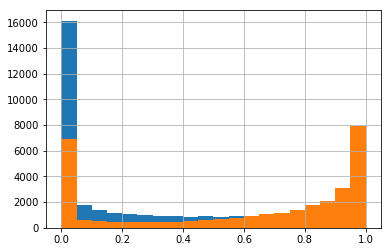

In [51]:
#data.DER_lep_eta_centrality[~data.DER_lep_eta_centrality.isin([-999.0])].groupby(data.Prediction).hist(bins=20)

In [52]:
#pd.plotting.scatter_matrix(data)

In [45]:
from preprocessing import *

# Finding the Best columns
best_number_of_colums = np.zeros(4)
best_per_of_columns = np.zeros(4)

for nbColumns in range(2,13):
#for nbColumns in [2, 5, 10]:
    y, tx, ids = oy, otx, oids
    test_y, test_tx,test_ids = otest_y, otest_tx, otest_ids
    # Preprocessing


    PRI_jet_num_colomn_train = tx[:, 22]
    PRI_jet_num_colomn_test = test_tx[:, 22]


    y_clustered = list()
    tx_clustered = list()
    ids_clustered = list()
    test_y_clustered = list()
    test_tx_clustered = list()
    test_ids_clustered = list()
   

    for i in range(4):
        indices = [ind for ind,a in enumerate(PRI_jet_num_colomn_train) if a == i]
        

        y_clustered.append(y[indices])
        tx_clustered.append(tx[indices])
        ids_clustered.append(ids[indices])

        test_indices = [ind for ind,a in enumerate(PRI_jet_num_colomn_test) if a == i]
        
        test_y_clustered.append(test_y[test_indices])
        test_tx_clustered.append(test_tx[test_indices])
        test_ids_clustered.append(test_ids[test_indices])

        #delete colinear columns and preprocess the data
        indices_to_delete = list()
        for col in range(tx_clustered[i].shape[1]):
            if min(tx_clustered[i][:, col]) == max(tx_clustered[i][:, col]):
                indices_to_delete.append(col)

        deleted_tx = np.delete(tx_clustered[i], indices_to_delete, 1)
        tx_clustered[i] = addColumns(deleted_tx, nbColumns)
        
        deleted_tx = np.delete(test_tx_clustered[i], indices_to_delete, 1)
        test_tx_clustered[i] = addColumns(deleted_tx, nbColumns)


    # Cross-Validation & Weight computation

    from cross_validation import *
    w = list()
    result = list()
    

    loss = 0
    perGood = 0
    maxW = 0
    for i in range(4):
        wi,loss_te, perGoodI = cross_validation_run(tx_clustered[i], y_clustered[i])
        if(perGoodI > best_per_of_columns[i]):
            best_per_of_columns[i] = perGoodI
            best_number_of_colums[i] = nbColumns
        
        w.append(wi)
        maxW += np.max(np.abs(wi))/4
        loss += loss_te/4
        perGood += perGoodI/4
        test_y_clustered[i] = predict_labels(w[i], test_tx_clustered[i])
        
    print("Number of columns : ", nbColumns, " loss : ", loss, "Max of w : ", maxW,  " Percentage of true Y : ", perGood)
print(best_number_of_colums) 

Number of columns :  2  loss :  0.339976835205 Max of w :  26.7578403775  Percentage of true Y :  0.745986200502
Number of columns :  3  loss :  1.16769308891 Max of w :  59.2409825309  Percentage of true Y :  0.776630951308
Number of columns :  4  loss :  0.868346137331 Max of w :  40.3989929125  Percentage of true Y :  0.787862555677
Number of columns :  5  loss :  7468019.40073 Max of w :  114.145544219  Percentage of true Y :  0.797252160852
Number of columns :  6  loss :  179832939619.0 Max of w :  11.2325125347  Percentage of true Y :  0.806634209627
Number of columns :  7  loss :  2.49018885368e+14 Max of w :  113.817212737  Percentage of true Y :  0.808852979694
Number of columns :  8  loss :  1.14560369884e+17 Max of w :  6923.05711899  Percentage of true Y :  0.798018689872
Number of columns :  9  loss :  6.25605795973e+21 Max of w :  12451.3077268  Percentage of true Y :  0.79639127385
Number of columns :  10  loss :  4.55544829557e+26 Max of w :  234886836968.0  Percentage 

In [46]:
print(best_per_of_columns)

[ 0.83820762  0.80326008  0.83186438  0.82976899]


# Using least square on [cst, tx, tx^2, ...] 
31 - 0.695085425438 

61 - 0.776

91 - 0.787

121 - 0.796

151 - 0.805

181 - 0.807

211 - 0.809

241 - 0.816

271 - 0.822

# Computing with good columns

In [47]:
y, tx, ids = oy, otx, oids
test_y, test_tx,test_ids = otest_y, otest_tx, otest_ids
# Preprocessing


PRI_jet_num_colomn_train = tx[:, 22]
PRI_jet_num_colomn_test = test_tx[:, 22]


y_clustered = list()
tx_clustered = list()
ids_clustered = list()
test_y_clustered = list()
test_tx_clustered = list()
test_ids_clustered = list()


for i in range(4):
    indices = [ind for ind,a in enumerate(PRI_jet_num_colomn_train) if a == i]


    y_clustered.append(y[indices])
    tx_clustered.append(tx[indices])
    ids_clustered.append(ids[indices])

    test_indices = [ind for ind,a in enumerate(PRI_jet_num_colomn_test) if a == i]

    test_y_clustered.append(test_y[test_indices])
    test_tx_clustered.append(test_tx[test_indices])
    test_ids_clustered.append(test_ids[test_indices])

    #delete colinear columns and preprocess the data
    indices_to_delete = list()
    for col in range(tx_clustered[i].shape[1]):
        if min(tx_clustered[i][:, col]) == max(tx_clustered[i][:, col]):
            indices_to_delete.append(col)

    deleted_tx = np.delete(tx_clustered[i], indices_to_delete, 1)
    tx_clustered[i] = addColumns(deleted_tx, int(best_number_of_colums[i]))

    deleted_tx = np.delete(test_tx_clustered[i], indices_to_delete, 1)
    test_tx_clustered[i] = addColumns(deleted_tx, int(best_number_of_colums[i]))


# Cross-Validation & Weight computation

from cross_validation import *
w = list()
result = list()


loss = 0
perGood = 0
maxW = 0
for i in range(4):
    wi,loss_te, perGoodI = cross_validation_run(tx_clustered[i], y_clustered[i])
    if(perGoodI > best_per_of_columns[i]):
        best_per_of_columns[i] = perGoodI
        best_number_of_colums[i] = nbColumns

    w.append(wi)
    maxW += np.max(np.abs(wi))/4
    loss += loss_te/4
    perGood += perGoodI/4
    test_y_clustered[i] = predict_labels(w[i], test_tx_clustered[i])

print(" loss : ", loss, "Max of w : ", maxW,  " Percentage of true Y : ", perGood)

 loss :  2.49018885906e+14 Max of w :  13558.3432935  Percentage of true Y :  0.825775270484


# Analysing why it isn't working

In [52]:

for i in range(4):
    realPred = np.dot(tx_clustered[i], w[i])
    #print(np.max(realPred))
    #df = pd.DataFrame(realPred)
    #df.hist(bins=300)
    y_pred = predict_labels(w[i],tx_clustered[i])
    
    false_index = [ind for ind,a in enumerate(y_clustered[i]) if y_pred[ind] != a]
    
    print(np.mean(realPred[false_index]))
    print("Per : ", percentageGood(y_clustered[i],tx_clustered[i],w[i]), "Len : ", len(y_clustered[i]) ) 
    
    print(len(w[i]))


-219002.595517
Per :  0.838809764495 Len :  99913
109
-0.058882926976
Per :  0.805168678428 Len :  77544
221
-0.738292260902
Per :  0.835129716747 Len :  50379
291
4.47902871365
Per :  0.836266016964 Len :  22164
291


# Post Processing

In [53]:
test_ids = [item for sublist in test_ids_clustered for item in sublist]
y_pred = [item for sublist in test_y_clustered for item in sublist]

test_ids, y_pred = zip(*sorted(zip(test_ids, y_pred)))

# Output Data

In [54]:
name = 'Current-Best-method.csv'
create_csv_submission(test_ids, y_pred, name)

In [28]:
np.zeros(4)

array([ 0.,  0.,  0.,  0.])